In [1]:
# Import depedencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from collections import Counter 
from imblearn.over_sampling import RandomOverSampler

# Prepare the data

In [2]:
# Read the CSV data and create a new dataframe

df = pd.read_csv("Resources/match_team_data.csv")

In [3]:
# Create a column to account for Wins, Losses, and Ties
# Win = 1 , Loss = 0, Tie = -1

df["home_win"] = np.where(df["home_score"] > df["away_score"], 1, np.where(df["home_score"] == df["away_score"],0,-1))

In [4]:
# Remove NaNs
df2 = df.drop(columns=["team_2_post_season_result","team_1_post_season_result"])

In [5]:
# Check for NaNs
df2.isna().mean().sort_values(ascending=False).head(10)

winning_name                0.073937
winning_abbr                0.073937
losing_name                 0.073937
losing_abbr                 0.073937
away_score                  0.070223
home_score                  0.070223
boxscore                    0.000000
team_2_margin_of_victory    0.000000
team_2_pass_yards           0.000000
team_2_pass_touchdowns      0.000000
dtype: float64

In [6]:
df3 = df2.dropna()

In [7]:
# Check for categorical data

df3.dtypes.sort_values().tail(15)

team_2_defensive_simple_rating_system    float64
team_1_points_contributed_by_offense     float64
away_name                                 object
away_abbr                                 object
home_name                                 object
home_abbr                                 object
team_2_abbreviation                       object
losing_name                               object
winning_abbr                              object
losing_abbr                               object
team_1_abbreviation                       object
team_2_name                               object
team_1_name                               object
winning_name                              object
boxscore                                  object
dtype: object

In [8]:
# Remove categorical data

df3.drop(columns=["away_name","away_abbr","home_name","home_abbr","team_2_abbreviation","losing_name","winning_abbr","losing_abbr","team_1_abbreviation","team_2_name","team_1_name","winning_name","boxscore","year","week","home_score","away_score"], inplace=True)

C:\Users\dariu\AppData\Local\Temp\ipykernel_13144\750371541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=["away_name","away_abbr","home_name","home_abbr","team_2_abbreviation","losing_name","winning_abbr","losing_abbr","team_1_abbreviation","team_2_name","team_1_name","winning_name","boxscore","year","week","home_score","away_score"], inplace=True)


# Fit the data to the model

In [9]:
# Create target and features

y = df3["home_win"]
X = df3.drop(columns="home_win")

In [10]:
# Apply Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [11]:
# Set the scaler
scaler = StandardScaler()

In [12]:
# Fit and Transform the data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create the model
model = RandomForestClassifier()

In [14]:
# Fit the data
model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# Make the predictions
y_pred = model.predict(X_test)

In [16]:
# print the results

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[142 169]
 [123 252]]
              precision    recall  f1-score   support

          -1       0.54      0.46      0.49       311
           1       0.60      0.67      0.63       375

    accuracy                           0.57       686
   macro avg       0.57      0.56      0.56       686
weighted avg       0.57      0.57      0.57       686

0.5743440233236151


# Find feature importances

In [17]:
# Create list of model feature names

importances_names = model.feature_names_in_

In [18]:
# View importances of features in Random Forest Model

#importances = model.feature_importances_

importances=model.feature_importances_
indices = np.argsort(importances)[::-1]  # index value of a feature
names = [X_train.columns[i] for i in indices]  # extract the title of that feature

In [19]:
names[:10]

['team_2_plays',
 'team_2_rank',
 'team_2_yards_from_penalties',
 'team_1_yards_from_penalties',
 'team_2_percent_drives_with_points',
 'team_1_penalties',
 'team_2_points_contributed_by_offense',
 'team_2_pass_attempts',
 'team_2_percent_drives_with_turnovers',
 'team_2_defensive_simple_rating_system']

In [20]:
# Create df that displays importances

importances_df = pd.DataFrame(importances,importances_names)

In [21]:
# Sort importances by values

importances_df.sort_values(ascending = False, by = [0]).tail(10)

,0
team_1_rush_touchdowns,0.008941
team_1_interceptions,0.008380
team_2_win_percentage,0.007429
team_1_losses,0.006636
team_2_wins,0.006541
team_1_win_percentage,0.006460
team_1_wins,0.006356
team_2_losses,0.006225
team_2_games_played,0.000000
team_1_games_played,0.000000


In [22]:
# drop the least important features
df4 = df3.drop(columns=["team_1_games_played","team_2_games_played","team_2_losses","team_1_wins","team_2_wins","team_1_losses"])

<AxesSubplot:>

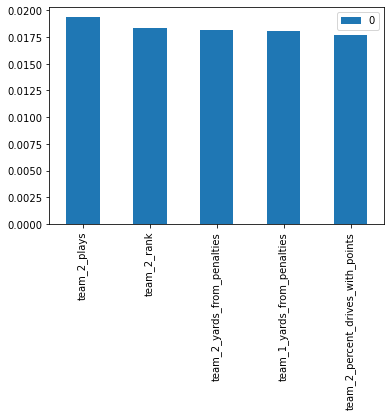

In [23]:
importances_df.sort_values(by = 0, ascending=False).head().plot(kind = "bar")

In [24]:
# View importances details

importances_df.describe()

,0
count,74.000000
mean,0.013514
std,0.003969
min,0.000000
25%,0.012135
50%,0.014729
75%,0.016315
max,0.019379


In [25]:
# Drop unimportant features and create new df

df4 = df3.drop(columns=["team_1_games_played","team_2_games_played","team_2_losses","team_1_wins","team_2_wins","team_1_losses"])

In [26]:
# Create new X and Y variables without dropped features

y = df4["home_win"]
X = df4.drop(columns="home_win")

In [27]:
# Create X and Y train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [28]:
# Scale X values

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
# Create y predictions

y_pred = model.predict(X_test)

In [31]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[149 162]
 [123 252]]
              precision    recall  f1-score   support

          -1       0.55      0.48      0.51       311
           1       0.61      0.67      0.64       375

    accuracy                           0.58       686
   macro avg       0.58      0.58      0.57       686
weighted avg       0.58      0.58      0.58       686

0.5845481049562682


# Tune the scaler

In [32]:
# Set scaler

scaler = MinMaxScaler()

In [33]:
# Fit X data to scaler

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
# Create y predictions

y_pred = model.predict(X_test)

In [36]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[137 174]
 [136 239]]
              precision    recall  f1-score   support

          -1       0.50      0.44      0.47       311
           1       0.58      0.64      0.61       375

    accuracy                           0.55       686
   macro avg       0.54      0.54      0.54       686
weighted avg       0.54      0.55      0.54       686

0.5481049562682215


In [37]:
# Try robust scaler

scaler = RobustScaler()

In [38]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
# Set y predictions 

y_pred = model.predict(X_test)

In [41]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[151 160]
 [137 238]]
              precision    recall  f1-score   support

          -1       0.52      0.49      0.50       311
           1       0.60      0.63      0.62       375

    accuracy                           0.57       686
   macro avg       0.56      0.56      0.56       686
weighted avg       0.56      0.57      0.57       686

0.5670553935860059


In [42]:
# Try MaxAbsScaler

scaler = MaxAbsScaler()

In [43]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Set y predictions

y_pred = model.predict(X_test)

In [46]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[145 166]
 [129 246]]
              precision    recall  f1-score   support

          -1       0.53      0.47      0.50       311
           1       0.60      0.66      0.63       375

    accuracy                           0.57       686
   macro avg       0.56      0.56      0.56       686
weighted avg       0.57      0.57      0.57       686

0.5699708454810496


# Tune the train_test_split

In [47]:
# Split X and Y data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=.3)

In [48]:
# Scale X data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Fit model

model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
# Set y predictions

y_pred = model.predict(X_test)

In [51]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[167 204]
 [163 289]]
              precision    recall  f1-score   support

          -1       0.51      0.45      0.48       371
           1       0.59      0.64      0.61       452

    accuracy                           0.55       823
   macro avg       0.55      0.54      0.54       823
weighted avg       0.55      0.55      0.55       823

0.5540704738760632


# Tune imbalancedness

In [52]:
# Use Counter to test training data for imbalancedness

Counter(y_train)

Counter({-1: 844, 1: 1076})

In [53]:
# Set model

ros = RandomOverSampler(random_state=1)

In [54]:
# Fit model sampler

X_train_oversampled,y_train_oversampled = ros.fit_resample(X_train, y_train) 

In [55]:
# Fit model

model.fit(X_train_oversampled,y_train_oversampled)

RandomForestClassifier()

In [56]:
# Make predictions

y_pred = model.predict(X_test)

In [57]:
# View model metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[203 168]
 [191 261]]
              precision    recall  f1-score   support

          -1       0.52      0.55      0.53       371
           1       0.61      0.58      0.59       452

    accuracy                           0.56       823
   macro avg       0.56      0.56      0.56       823
weighted avg       0.57      0.56      0.56       823

0.5637910085054678
